In [1]:
import matplotlib.pyplot as plt
# import matplotlib
import numpy as np
# import tkinter
# matplotlib.use('TkAgg')
%matplotlib inline

#plumed sum_hills --hills HILLS

In [2]:
def openHills(fileName):
    with open(fileName) as file:
        [file.readline() for x in range(5)]
        data = np.fromfile(file, sep= " ", dtype=float)
    phi, energy, error = data.reshape(-1,3).T
    phi = (phi/np.pi)*180
    energy = energy - energy.min()
    return phi, energy, error

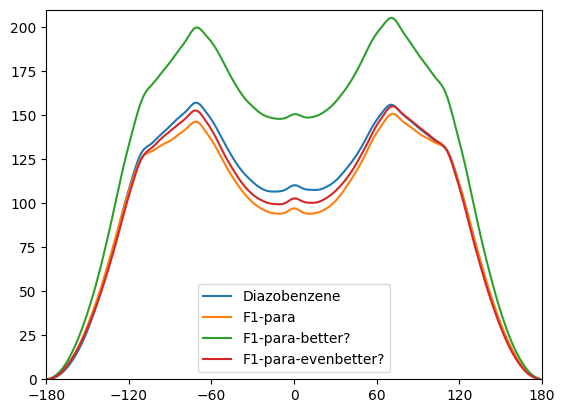

In [4]:
fileNames= {
    "hills": "Diazobenzene",
    "hills2" : "F1-para",
    "F1P-Hills": "F1-para-better?",
    "F1P-Hills2": "F1-para-evenbetter?",
}

def genData(fileNames:dict[str,str]):
    for fileName in fileNames.keys():
        data = openHills(fileName)
        label = fileNames[fileName]
        yield data, label


fig, ax = plt.subplots()
ax.set_xlim(-180, 180)
ax.set_ylim(0, 210)
ax.set_xticks([x for x in range(-180, 181, 60)])
for data, label in genData(fileNames):
    ax.plot(data[0], data[1], label = label)
ax.legend();


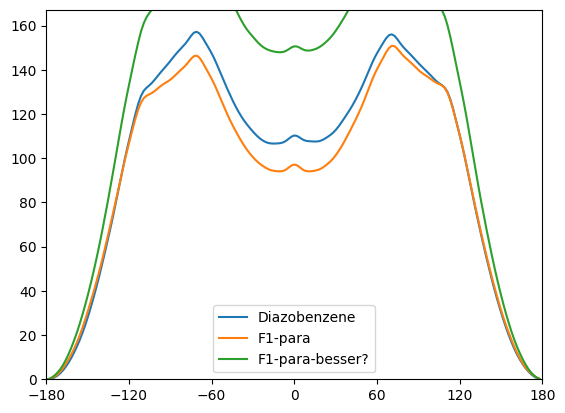

In [ ]:
phi1, energy1, error = openHills("hills")
phi2, energy2, error = openHills("hills2")
phi3, energy3, error = openHills("F1P-Hills")


fig, ax = plt.subplots()
ax.plot(phi1, energy1, label = "Diazobenzene")
ax.plot(phi2, energy2, label = "F1-para")
ax.plot(phi3, energy3, label = "F1-para-besser?")
ax.set_xlim(-180, 180)
ax.set_ylim(0, energy1.max()+10)
ax.set_xticks([x for x in range(-180, 181, 60)])
ax.legend();